In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing()

# Buat dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Tambahkan kolom target (harga rumah)

# Cek beberapa nilai pertama
print(df.head())
print(df['target'][:10])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: target, dtype: float64


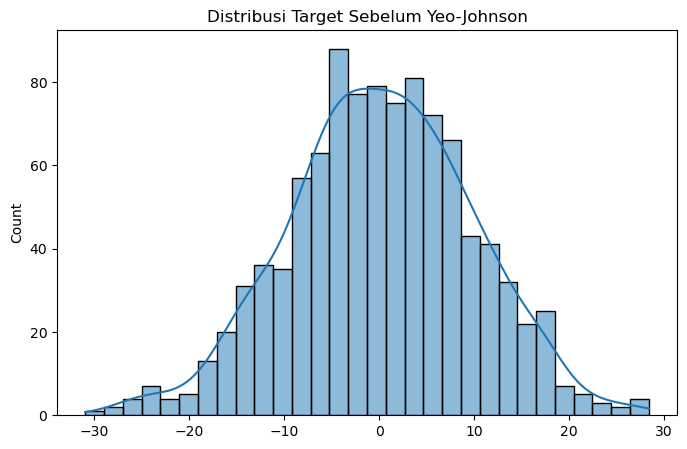

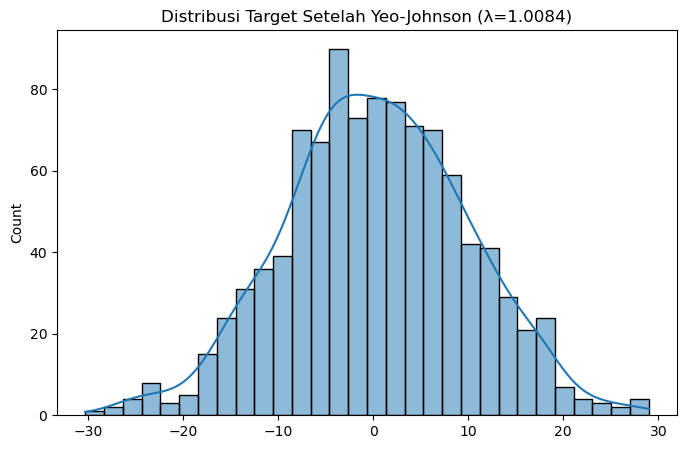

Lambda terbaik untuk Yeo-Johnson: 1.0084


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson

# Contoh data target yang punya nilai negatif
y = np.random.randn(1000) * 10  # Distribusi normal tapi bisa negatif

# Plot sebelum transformasi
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribusi Target Sebelum Yeo-Johnson")
plt.show()

# Terapkan transformasi Yeo-Johnson
y_transformed, lambda_best = yeojohnson(y)

# Plot setelah transformasi
plt.figure(figsize=(8, 5))
sns.histplot(y_transformed, kde=True, bins=30)
plt.title(f"Distribusi Target Setelah Yeo-Johnson (λ={lambda_best:.4f})")
plt.show()

print(f"Lambda terbaik untuk Yeo-Johnson: {lambda_best:.4f}")


#### Oke, kita lanjut ke modeling dengan target yang sudah ditransformasi menggunakan Yeo-Johnson! 🚀

#### 🔥 Langkah-langkahnya:
#### Gunakan target hasil transformasi (Yeo-Johnson) untuk melatih model

#### Pisahkan data menjadi train & test set

#### Pilih model (misal: Linear Regression, Random Forest, atau XGBoost)

#### Latih model dengan target hasil transformasi

#### Evaluasi model (R², RMSE, dll)

#### Jika model dipakai untuk prediksi real-world, lakukan inverse transformasi ke target asli

## 📌 Kode Contoh: Modeling dengan Linear Regression

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import yeojohnson

# 1. Load dataset (anggap X adalah fitur dan y adalah target sebelum transformasi)
X = df.drop(columns=["target"])
y = df["target"]

# 2. Transformasi Yeo-Johnson ke target
y_transformed, lambda_best = yeojohnson(y)

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# 4. Model training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Prediksi & Evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# 6. Jika perlu mengembalikan ke skala asli:
y_pred_original = np.power((y_pred * lambda_best) + 1, 1 / lambda_best) if lambda_best != 0 else np.exp(y_pred)


Mean Squared Error: 0.023712564015837247
R² Score: 0.6002872622855526
